# Homework 3

## Pair Programming Group Number: 15
## Members of Team: Chloe Jin, Ankita Sumeet

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
url = 'https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/'
df = pd.read_csv(url)
df

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
2,Abbotsford,129 Charles St,2,h,941000.0,7/05/2016,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan
3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
7996,Highett,23 The Crescent,3,h,1260000.0,29/07/2017,3190.0,3.0,1.0,0.0,642.0,NaN,NaN,Kingston,-37.94691,145.04935,Southern Metropolitan
7997,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan
7998,Hillside,1/14 Jade Wy,3,u,485000.0,29/07/2017,3037.0,3.0,2.0,2.0,345.0,NaN,2005.0,Melton,-37.70428,144.74705,Western Metropolitan


## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
df1 = df.dropna(axis=0).reset_index(drop=True)
df1

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    # code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation
    r = 6371.0088
    
    lat1, lon1 = np.radians(pt1[0]), np.radians(pt1[1])
    lat2, lon2 = np.radians(pt2[0]), np.radians(pt2[1])
    
    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    
    # haversine formula
    hav = (np.sin(lat_diff/2)**2) + np.cos(lat1) * np.cos(lat2) * (np.sin(lon_diff/2)**2)

    # arcsin = sqrt(hav)
    arcsin = np.sqrt(hav)
    
    # d = 2r(arcsin)
    d = 2 * r * np.arcsin(arcsin)
    
    return(round(d, 2))

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])

30.24

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
df2 = df1.copy()
df2['distance_to_toorak'] = df2.apply(lambda x : haversine_distance(toorak_pt, [x['Lattitude'], x['Longtitude']]), axis = 1) # lambda as embedded func.
df2

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.26
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.62
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.37
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.78
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,17.00
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.49
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.80
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.99


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
df3 = pd.get_dummies(df2, columns = ['Type'])
df3

,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,Type_h,Type_t,Type_u
0,Abbotsford,25 Bloomburg St,2,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.26,1,0,0
1,Abbotsford,124 Yarra St,3,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.62,1,0,0
2,Abbotsford,98 Charles St,2,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.37,1,0,0
3,Abbotsford,10 Valiant St,2,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.78,1,0,0
4,Abbotsford,123/56 Nicholson St,2,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.15,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,17.00,1,0,0
3906,Greensborough,12 Yangoora Pl,4,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.49,1,0,0
3907,Highett,1/12 Jillian Av,3,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.80,0,1,0
3908,Highett,31 The Crescent,4,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.99,0,1,0


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
df3.corr(method='pearson')

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,Type_h,Type_t,Type_u
Rooms,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232851,0.501128,-0.040762,-0.535102
Price,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.356997,0.391761,-0.095295,-0.372766
Postcode,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008057,-0.040504,-0.008546,0.051754
Bedroom2,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241526,0.484612,-0.037366,-0.518941
Bathroom,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051675,0.181773,0.108148,-0.282390
Car,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214770,0.214175,-0.006836,-0.236298
Landsize,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041417,0.047422,-0.067257,-0.005103
BuildingArea,0.547816,0.465598,0.089355,0.532910,0.470554,0.299613,0.063136,1.000000,0.024754,-0.047501,0.084074,0.076676,0.306231,-0.032396,-0.321614
YearBuilt,-0.030447,-0.330560,0.035561,-0.010031,0.192470,0.153313,0.028638,0.024754,1.000000,0.052205,0.023062,0.300231,-0.402670,0.331105,0.215689
Lattitude,0.012858,-0.224400,-0.445625,0.019970,-0.068643,-0.007839,0.010734,-0.047501,0.052205,1.000000,-0.366331,0.281688,0.121254,-0.028636,-0.115991


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [8]:
# Step one, build the matrix X
X = df3[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'distance_to_toorak', 'Type_h', 'Type_t', 'Type_u']]
X

,Rooms,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,distance_to_toorak,Type_h,Type_t,Type_u
0,2,2.0,1.0,0.0,156.0,79.0,1900.0,4.26,1,0,0
1,3,4.0,2.0,0.0,245.0,210.0,1910.0,4.62,1,0,0
2,2,2.0,1.0,2.0,256.0,107.0,1890.0,4.37,1,0,0
3,2,3.0,1.0,2.0,220.0,75.0,1900.0,4.78,1,0,0
4,2,2.0,2.0,1.0,0.0,94.0,2009.0,4.15,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3905,3,3.0,1.0,1.0,422.0,104.0,1960.0,17.00,1,0,0
3906,4,4.0,3.0,1.0,807.0,190.0,1975.0,18.49,1,0,0
3907,3,3.0,1.0,2.0,269.0,125.0,2000.0,11.80,0,1,0
3908,4,4.0,2.0,2.0,304.0,183.0,2007.0,11.99,0,1,0


In [9]:
# Step two, build the column vector y
y = df3['Price']
y

0       1035000.0
1       1876000.0
2       1636000.0
3       1097000.0
4        750000.0
          ...    
3905     680000.0
3906     900000.0
3907    1200000.0
3908    1200000.0
3909     618350.0
Name: Price, Length: 3910, dtype: float64

In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
[beta_hat, residuals, rank, s] = np.linalg.lstsq(X, y, rcond=None) # use rcond = None or -1
beta_hat.reshape(11, 1) # output format

array([[ 1.38277135e+05],
       [ 2.42264088e+04],
       [ 2.17365144e+05],
       [ 5.68836476e+04],
       [ 1.89935619e+01],
       [ 1.27978760e+03],
       [-3.28196454e+03],
       [-4.42337862e+04],
       [ 7.01530812e+06],
       [ 6.83844090e+06],
       [ 6.71512621e+06]])

In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat) 

714521.5642644353

In [12]:
# This is the actual price at this point
y[23] # double check model?

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [13]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.

## Load in the melb_data_sold_test.csv file here
url = 'https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv'
new_df = pd.read_csv(url)

## Imputation
## new_df.columns[new_df.isna().any()] --> Index(['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea'], dtype='object')
new_df['Car'].fillna(new_df['Car'].mean(), inplace=True)
new_df['BuildingArea'].fillna(new_df['BuildingArea'].mean(), inplace=True)
new_df['YearBuilt'].fillna(new_df['YearBuilt'].mean(), inplace=True)
# new_df['CouncilArea'].fillna(new_df['CouncilArea'].mean(), inplace=True)
# new_df.head(5)

In [14]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
# haversine formula
new_df['distance_to_toorak'] = new_df.apply(lambda x : haversine_distance(toorak_pt, [x['Lattitude'], x['Longtitude']]), axis = 1)

# one-hot encoding
encoded_new_df = pd.get_dummies(new_df, columns=["Type"])
encoded_new_df.head()

,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,Type_h,Type_t,Type_u
0,Jacana,29 Fox Ct,3,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,244.154731,1968.796396,Hume,-37.68907,144.91459,Northern Metropolitan,19.18,1,0,0
1,Keilor Park,45 Collinson St,3,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.000000,Brimbank,-37.72224,144.85739,Western Metropolitan,19.26,1,0,0
2,Kensington,42 Gower St,3,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,244.154731,1968.796396,Melbourne,-37.79560,144.92779,Northern Metropolitan,9.30,1,0,0
3,Kew,6/385 Barkers Rd,3,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.000000,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.17,0,1,0
4,Kew,11 Raheen Dr,4,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.000000,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.17,1,0,0


In [15]:
# Step two, build the attribute matrix Xdot 
Xdot = encoded_new_df[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'distance_to_toorak', 'Type_h', 'Type_t', 'Type_u']]
act_price = encoded_new_df['Price']
Xdot

,Rooms,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,distance_to_toorak,Type_h,Type_t,Type_u
0,3,3.0,1.0,4.0,764.0,244.154731,1968.796396,19.18,1,0,0
1,3,3.0,2.0,2.0,761.0,222.000000,1980.000000,19.26,1,0,0
2,3,3.0,1.0,0.0,190.0,244.154731,1968.796396,9.30,1,0,0
3,3,3.0,2.0,2.0,325.0,129.000000,1980.000000,4.17,0,1,0
4,4,4.0,2.0,2.0,813.0,276.000000,1970.000000,4.17,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1016,4,4.0,2.0,2.0,717.0,191.000000,1980.000000,18.26,1,0,0
1017,4,4.0,2.0,1.0,662.0,172.000000,1980.000000,32.81,1,0,0
1018,3,3.0,2.0,2.0,256.0,244.154731,1968.796396,21.03,1,0,0
1019,4,4.0,2.0,2.0,652.0,244.154731,1981.000000,15.08,1,0,0


In [16]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
y_hat = np.dot(Xdot, beta_hat)
y_hat

array([ 964771.7881568 ,  999650.77403984, 1163364.70120915, ...,
        976888.40278193, 1370052.63089406, 1429252.02497551])

In [17]:
act_price.describe() 

count    1.021000e+03
mean     1.113054e+06
std      6.001134e+05
min      2.830000e+05
25%      7.000000e+05
50%      9.550000e+05
75%      1.342000e+06
max      6.400000e+06
Name: Price, dtype: float64

In [18]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
abs_err = abs(act_price - y_hat)
# abs_err.describe() - necessary?

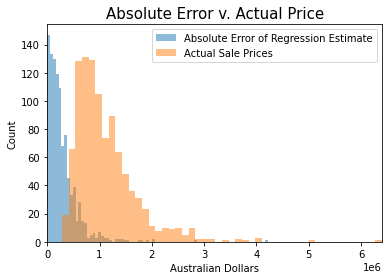

In [19]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
plt.hist(abs_err, bins='auto', alpha=0.5) # alpha?
plt.hist(act_price, bins='auto', alpha=0.5) # alpha?
plt.xlim(0, max(act_price))
plt.xlabel("Australian Dollars", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Absolute Error v. Actual Price", fontsize=15)
plt.legend(["Absolute Error of Regression Estimate", "Actual Sale Prices"])